In [1]:
import sys
sys.path.append('../')
import re
import os
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import json

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
ans_pattern = re.compile(r'@content\d@')

def find_answer_in_docid(answer):
    docs = ans_pattern.findall(answer)
    return list(set([int(doc[-2:-1]) for doc in docs]))


In [27]:
total_train_sample_cnt = 0
ans_in_doc_sample_cnt = 0
for i in range(10):
    with open('../input/extracted/split_train_0{}'.format(i)) as f:
        for line in f:
            sample = json.loads(line.strip())
            
            answer = sample['answer']
            
            total_train_sample_cnt += 1
            
            sub_ans_cnt = 0
            sub_ans_in_content = 0
            ans_in_docids = find_answer_in_docid(answer)
            for ans_docid in ans_in_docids:
                doc_content = ''.join(sample['documents'][ans_docid - 1]['paragraphs'])
                ans_results = answer.split('@content{}@'.format(ans_docid))
                for ans_str in ans_results:
                    ans_str = ans_str.strip()  # IMPORTANT
                    if ans_str != '' and '@content' not in ans_str:
                        sub_ans_cnt += 1
                        if ans_str in doc_content:
                            sub_ans_in_content += 1
                        if ans_str.endswith('。') and ans_str[:-1] in doc_content:  # IMPORTANT
                            sub_ans_in_content += 1
            
            if sub_ans_in_content == sub_ans_cnt:
                ans_in_doc_sample_cnt += 1
            else:
                print(sample['question_id'])

print(total_train_sample_cnt, ans_in_doc_sample_cnt)
print(total_train_sample_cnt - ans_in_doc_sample_cnt)
print(ans_in_doc_sample_cnt / total_train_sample_cnt)

Q_19994dhsjj
Q_28570sddgq
Q_22893gcjsg
Q_40902hyhks
Q_13757ngnsy
Q_30476cjnds
Q_25824gqncc
Q_17132hkssg
Q_14291nshgg
Q_52383hgqss
Q_18230yksdg
Q_08205qhcdk
Q_46637knhnc
Q_46324hncck
Q_47878jjygc
Q_51118csskc
Q_40466dcscc
Q_04399hjqhk
Q_28160hjdjn
Q_28625ggqdj
Q_07944dkdkc
Q_00078ncnsq
Q_00390nhqkq
Q_00684skdyn
Q_03248jqqcj
Q_26863dydsj
Q_20852djsny
Q_25432qndqs
Q_17179cshnn
Q_08206nkhck
Q_13388jqsqj
Q_31106yqhkg
Q_36526nscgd
Q_01701ngdyn
Q_50650qcdhy
Q_25384sqjck
Q_07416nyjkn
Q_05679qhngj
Q_52045cndkd
Q_48880cyyjh
Q_15278nndhs
Q_01909skscd
Q_44844sqcgh
Q_02228cnghc
Q_51690dkyqk
Q_19424sjkdd
Q_14340hnksy
Q_40566qqddh
Q_04649qsgdg
Q_26650ngndy
Q_23614jjskk
Q_03477ncnsk
Q_21806ndnqs
Q_53378nsgyc
Q_18690hgycg
Q_53891dsnnd
Q_15775dkydc
Q_08005gjqkq
Q_35135jckgc
Q_42121jgkhy
Q_10409nydjg
Q_12597kdccn
Q_27227snksq
Q_12978qcjnn
Q_26066qsqgd
Q_34759gqkhq
Q_13572khnnc
Q_50641dhkhh
Q_11674kgycy
Q_22357kssdc
Q_47210qkhcd
Q_26115jcgcg
Q_23398snqch
Q_21185hssyh
Q_23427yqych
Q_04212ncnnj
Q_18725dkcqh

Q_29838nyckk
Q_48466njnhq
Q_39785qhgch
Q_51525qdsqg
Q_12623snqjk
Q_49036skhsq
Q_15613sqskc
Q_00046hyngc
Q_18056jyjsq
Q_19735hsqhd
Q_53358sjcsk
Q_34721qcksj
Q_08149gjdkc
Q_49440qhcgs
Q_00245dcyyg
Q_13902gddcn
Q_42156jqdyn
Q_07746jkdsc
Q_30033gshjs
Q_06401qhhqk
Q_14210jhsyc
Q_07260cjngy
Q_54378hdggn
Q_16958kjknh
Q_34400sjddy
Q_02524kqghq
Q_12188gjndn
Q_11102snngj
Q_07045ckkdj
Q_47784sykjd
Q_18534qcjyn
Q_45368gsgcg
Q_13129qkhcy
Q_35065ssnjs
Q_28166hdgys
Q_22379kjghh
Q_29686qkggn
Q_20633dqnss
Q_22135sjscn
Q_21839hhcjc
Q_20484ykksq
Q_02659hqqhn
Q_03601jgkcy
Q_01494jcsyg
Q_09759dkjhs
Q_14077jccjd
Q_23450jhhyq
Q_20634dgnkh
Q_32607hsndk
Q_06305gjhds
Q_16537hkqcc
Q_14740jjnqk
Q_27950gqnkq
Q_30511hcgdd
Q_11473ycnck
Q_04021jshnk
Q_25169hqcgk
Q_19614qkykh
Q_00843hqgnn
Q_27938hnscd
Q_19534gdcnj
Q_42317cyqnj
Q_27701cnddh
Q_22465sdcsd
Q_22615sjgss
Q_29750chgdk
Q_17030dnnnj
Q_52540knhhh
Q_05045sdqkd
Q_17238jnqyh
Q_45208dkqjy
Q_27490qjdyy
Q_29284nqdkq
Q_38902dckcc
Q_06799jcqnc
Q_09013yskny
Q_30491njjqd

Q_05520kcygh
Q_28514sgkcq
Q_38532njchy
Q_06354qdhhs
Q_08215sgqnk
Q_41515ynsks
Q_17523snkks
Q_31360hkqjc
Q_26107cdcys
Q_34366dhhkj
Q_17192qdkyj
Q_27693hknjh
Q_30085yhjgc
Q_24691gjjgy
Q_02558ngdcg
Q_24362sgjhh
Q_00470djdsy
Q_15166cjcjg
Q_45787dqqsy
Q_15336scssq
Q_45716dhcgs
Q_02962qygny
Q_34234jjhqh
Q_44385yqycy
Q_41218jkcjs
Q_06027hgygd
Q_19610nkdyc
Q_26669ykncy
Q_06811sghjg
Q_28349dkjcd
Q_00191cgjsk
Q_20539cqsyj
Q_47262yqkgq
Q_26532jjdkd
Q_39215cqyqy
Q_03516qhdjc
Q_54675ghsdq
Q_15950jcjdd
Q_13634ksnsq
Q_13038ccqyk
Q_03757yjjyh
Q_28831dqghd
Q_05474chdsg
Q_16120qjqsd
Q_33859yyjhg
Q_31929ghjhk
Q_30888kjgcq
Q_19086dcdcg
Q_18956hgnck
Q_11014qggcq
Q_21459jhssg
Q_16354knkgq
Q_16966khsch
Q_08435csssk
Q_20942cygjd
Q_25172jdkch
Q_07871qnskd
Q_27175hjjdy
Q_27518kdkhc
Q_18239gshsn
Q_41740gsgqq
Q_40062kqnqj
Q_11241ksskk
Q_53049dqjqc
Q_36616hyhsj
Q_15847cgssh
Q_13109nydng
Q_27802gsdjc
Q_36568kkgdy
Q_29991gnscd
Q_09425jdndn
Q_39354ysskh
Q_46993hncgn
Q_01590yqggy
Q_13210syjds
Q_14711sjdng
Q_37100yhncs

Q_15189ndndj
Q_21825kqyjq
Q_40007hncqg
Q_13502nycsj
Q_21380chdhg
Q_51163cqgkj
Q_22705gdynd
Q_00037khdsy
Q_28764gcggd
Q_02719hhqnn
Q_11491ggcgj
Q_12573jgykq
Q_28783hndyh
Q_10735yhckd
Q_25728jgydn
Q_37460qqgjj
Q_24917dkqdq
Q_48249yyhsd
Q_13444nkhhc
Q_09915kcsyy
Q_14252cnjcj
Q_08368jqydq
Q_10645cjdhk
Q_12964ncyyg
Q_05199hhnyg
Q_10290hngcd
Q_28657khkhk
Q_16619ycskg
Q_24859jqsjh
Q_13809jscyh
Q_47845ggdky
Q_02110hhhjk
Q_26812qhkkj
Q_09662yhgcc
Q_12359dskgd
Q_53681hchjs
Q_35866jsqhs
Q_48957nqjss
Q_30131hscsq
Q_06234jsggs
Q_08082kjnyc
Q_16761cdgqy
Q_17788ncqnk
Q_07464kcgyq
Q_30432sjhcc
Q_00907qkncj
Q_39943ksqsy
Q_23206kjdhs
Q_02715hyhds
Q_09317qjcck
Q_07019qjchy
Q_12171yjdgj
Q_27627sdjkd
Q_10198nhgqj
Q_38143qgjhh
Q_25418jnhck
Q_15053qhdcq
Q_21067kqsns
Q_06557cqddn
Q_17272qqdgy
Q_09925qjhcy
Q_32150gjdns
Q_52321hyjhh
Q_06799qnnhy
Q_06155jhngn
Q_22931jcqsd
Q_17844sgqss
Q_00236cqkdk
Q_14800snshy
Q_29942djydh
Q_31244cdqhj
Q_00152qhgss
Q_10741hjjhj
Q_17843gjgsk
Q_24292gsshc
Q_35914sgkqk
Q_43643cgnng

In [5]:
a = '012345678'

In [7]:
a.index('345')

3

In [8]:
a[3:6]

'345'

## 检查答案是否都在 supporting_paragraph 中

In [16]:
total_train_sample_cnt = 0
ans_in_support_para_sample_cnt = 0

for i in range(10):
    with open('../input/extracted/split_train_0{}'.format(i)) as f:
        for line in f:
            sample = json.loads(line.strip())
            total_train_sample_cnt += 1
            answer = sample['answer']
            ans_in_docids = find_answer_in_docid(answer)
            
            sub_ans_cnt = 0
            sub_ans_in_support = 0
            for ans_docid in ans_in_docids:
                ans_results = answer.split('@content{}@'.format(ans_docid))
                for ans_str in ans_results:
                    ans_str = ans_str.strip()  # IMPORTANT
                    if ans_str != '' and '@content' not in ans_str:
                        sub_ans_cnt += 1
                        if ans_str in sample['supporting_paragraph']:
                            sub_ans_in_support += 1
                        elif ans_str.endswith('。') and ans_str[:-1] in sample['supporting_paragraph']:
                            sub_ans_in_support += 1
            
            if sub_ans_in_support == sub_ans_cnt:
                ans_in_support_para_sample_cnt += 1


In [17]:
ans_in_support_para_sample_cnt / total_train_sample_cnt

0.9932375316990701

**可以看出答案几乎都在 supporting_paragraph 中，所以进行答案定位的时候，需要先根据 supporting_paragraph 缩小答案的搜索范围，再在其中定位答案的实际开始和结束的下标，同时需要注意加上 supporting_paragraph 搜索下标的偏移**

## 统计生成的 fake answer 的 ceil rougel

In [13]:
ceil_rougels = []

for i in range(1, 4):
    with open('../input/mrc_dataset/split_train_0{}'.format(i)) as f:
        for line in f:
            sample = json.loads(line.strip())
            ceil_rougels.append(sample['ceil_rougel'])

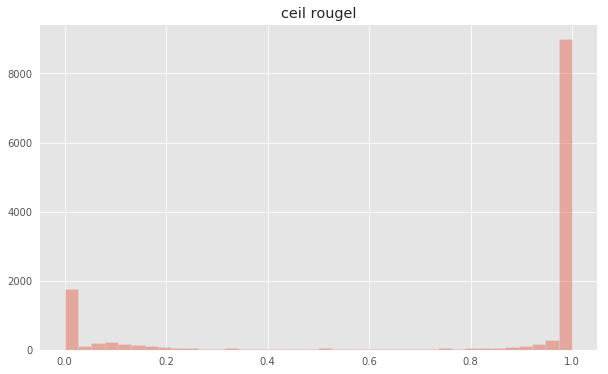

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(ceil_rougels, kde=False)
plt.title('ceil rougel')
plt.show()

In [15]:
ceil_rougels = np.array(ceil_rougels)

In [16]:
len(ceil_rougels), len(ceil_rougels[ceil_rougels<0.2]), len(ceil_rougels[ceil_rougels>0.8])

(13184, 2750, 9745)

In [17]:
len(ceil_rougels[ceil_rougels>0.8]) / len(ceil_rougels)

0.7391535194174758